# IF4071 Pembelajaran Mesin
## Tugas Kecil I: Eksplorasi Scikit-learn untuk Clustering pada Jupyter Notebook

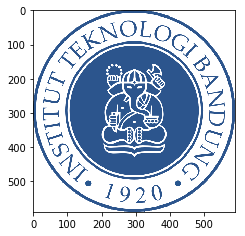

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
im_name = 'dataset/logo_itb.png'
img = cv2.imread(im_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
plt.imshow(img)

##### oleh: Muhammad Hilmi Asyrofi - 13515083

Pada dokumentasi ini akan dilakukan eksplorasi berbagai algoritma clustering scikit-learn pada Jupyter Notebook. Dokumentasi ini dibuat oleh Muhammad Hilmi Asyrofi (13515083) sebagai salah satu Tugas Kecil mata kuliah IF4071 Pembelajaran Mesin (<i>Machine Learning</i>). Algoritma yang diimplementasikan pada dokumentasi ini yaitu K-Means, Agglomerative, DBSCAN, Gaussian Mixture, K-Medoids, MST, dan Grid-based Clustering. Untuk beberapa algoritma, akan dilakukan penyimpanan model pembelajaran ke dalam <i>file external</i> agar dapat digunakan lagi pada waktu lain. Pipeline utama dari metode percobaan yang dilakukan yaitu:
    - Import Dataset
    - One Hot Encoder (hanya pada data kategorik)
    - Implementasi Algoritma Clustering
    - Penyimpanan Model Pembelajaran
    - Prediksi Label dari Unseen Data

## Import Dataset

Pada tahap ini dilakukan pembacaan dataset dari file csv menjadi sebuah variabel yang dapat digunakan pada tahap selanjutnya. Berdasarkan kolom yang ada, dataset akan dibagi menjadi dua yaitu, dataset yang berisi feature dan dataset yang berisi label kelas. Ada dua dataset yang digunakan pada percobaan kali ini, yaitu dataset iris dan dataset play tennis.

In [2]:
import pandas as pd 
import numpy as np
np.seterr(over='ignore')
import pickle

# read iris data
df = pd.read_csv('dataset/iris.csv')
iris_features = df.drop('variety', axis = 1)
iris_labels = df.drop(list(iris_features), axis = 1)

# read tennis data
df = pd.read_csv('dataset/tennis.csv')
df = df.drop('day', axis = 1)
tennis_features = df.drop('play', axis = 1)
tennis_labels = df.drop(list(tennis_features), axis = 1)

In [3]:
iris_features.head(5)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
tennis_features.head(5)

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


## One Hot Encoder 

Data dengan tipe kategorik seperti data play tennis tidak bisa langsung diolah karena nilainya berupa string. Data ini perlu diubah menjadi sparse data agar menjadi data yang dapat memiliki makna untuk diproses nantinya. Konversi data kategorik menjadi sparse dilakukan dengan dua langkah yaitu dengan melakukan LabelEncoder dan OneHotEncoder. Langkah tersebut dipermudah dengan bantuan pustaka dari panda

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

tennis_features = pd.get_dummies(tennis_features)

In [6]:
tennis_features.head()

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


## Implementasi Algoritma Clustering

### K-Means

In [7]:
from sklearn.cluster import KMeans

# iris dataset
kmeans_iris_model = KMeans(n_clusters = 3, random_state = 0)

kmeans_iris_model.fit(iris_features)

iris_result = kmeans_iris_model.predict(iris_features)
print(iris_result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**** hasil di atas merupakan contoh hasil prediksi K-Means pada data asli. Dapat dilihat bahwa data pertama diprediksi menjadi kelas 1 dan data terakhir menjadi kelas 0. Cara pembacaan hasil prediksi data juga sama untuk percobaan lainnya selain K-Medoids dan Grid Clustering.

In [8]:
# tennis dataset
kmeans_tennis_model = KMeans(n_clusters = 2, random_state = 0)

kmeans_tennis_model.fit(tennis_features)

tennis_result = kmeans_tennis_model.predict(tennis_features)

print(tennis_result)

[1 1 1 1 0 0 0 1 0 0 0 1 0 1]


### Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering

# iris dataset
clustering = AgglomerativeClustering()
iris_result = clustering.fit_predict(iris_features)

print(iris_result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [10]:
# tennis dataset
clustering = AgglomerativeClustering()
tennis_result = clustering.fit_predict(tennis_features)

print(tennis_result)

[0 0 0 0 1 1 1 0 1 1 0 0 0 0]


### DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

# iris dataset
clustering = DBSCAN(eps=1, min_samples=4)
iris_result = clustering.fit_predict(iris_features)

print(iris_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [12]:
# tennis dataset
clustering = DBSCAN(eps=4, min_samples=2)
tennis_result = clustering.fit_predict(tennis_features)

print(tennis_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Gaussian Mixture

In [13]:
from sklearn.mixture import GaussianMixture

# iris dataset
gmm_iris_model = GaussianMixture()
gmm_iris_model.fit(iris_features)

iris_result = gmm_iris_model.predict(iris_features)

print(iris_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [14]:
# tennis dataset
gmm_tennis_model = GaussianMixture()
gmm_tennis_model.fit(tennis_features)

tennis_result = gmm_tennis_model.predict(tennis_features)

print(tennis_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### K-Medoids

In [15]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric

# iris dataset
features = np.array(iris_features)
    
metric = distance_metric(type_metric.MINKOWSKI, degree = 4)
# metric = distance_metric(type_metric.CHEBYSHEV)

# set initial medoids
initial_medoids = [1, 51, 101]

# create instance of K-Medoids algorithm
kmedoids_instance = kmedoids(features, initial_medoids, metric = metric)

# run cluster analysis and obtain results
kmedoids_instance.process();

clusters = kmedoids_instance.get_clusters()

# show allocated clusters
print(clusters)

[[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [99, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 106, 121], [116, 50, 52, 72, 76, 77, 83, 86, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]]


**** hasil di atas merupakan contoh hasil prediksi K-Medois pada data asli. Dapat dilihat bahwa data ke-7 diprediksi menjadi kelas 1, data ke-99 menjadi kelas 2 dan data ke-116 menjadi kelas 3. Cara pembacaan hasil prediksi data juga sama untuk percobaan pada Grid Clustering.

In [16]:
# tennis dataset
features = tennis_features
list_features = np.array(features)
    
metric = distance_metric(type_metric.MINKOWSKI, degree = 4)
# metric = distance_metric(type_metric.CHEBYSHEV)

# set initial medoids
initial_medoids = [1, 6]

# create instance of K-Medoids algorithm
kmedoids_instance = kmedoids(list_features, initial_medoids, metric = metric)

# run cluster analysis and obtain results
kmedoids_instance.process();
clusters = kmedoids_instance.get_clusters()

# show allocated clusters
print(clusters)

[[7, 0, 1, 2, 3, 10, 11, 13], [4, 5, 6, 8, 9, 12]]


### MST

In [17]:
import matplotlib.pyplot as plt

# iris dataset
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=0.7, approximate=False)
iris_result = model.fit_predict(iris_features)

print(iris_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [18]:
# tennis dataset
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=1.414214, approximate=False)
tennis_results = model.fit_predict(tennis_features)

print(tennis_results)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0]


### Grid Clustering

In [19]:
from pyclustering.cluster.bang import bang

# Read data n dimensional data.
data = list_features

# Prepare algorithm's parameters.
levels = 2

# Create instance of BANG algorithm.
bang_instance = bang(np.array(tennis_features), levels)
bang_instance.process()

# Obtain clustering results.
clusters = bang_instance.get_clusters()
print(clusters)

[[0, 13]]


/home/mhilmiasyrofi/tensorflow-py3/venv/lib/python3.5/site-packages/pyclustering/cluster/bang.py:629: RuntimeWarning: divide by zero encountered in true_divide
  return self.__get_amount_points() / self.__spatial_block.get_volume()


**** terjadi runtime warning yang menyebabkan prediksi cluster tidak sesuai

## Penyimpanan Model Pembelajaran

Agar dapat mempermudah penggunaan model di lain waktu, maka perlu dilakukan penyimpanan model pembelajaran. Penyimpanan model dilakukan dengan bantuan pustaka pickle. Model tersebut nantinya akan digunakan untuk memprediksi contoh unseen data pada dua dataset yang ada. Karena keterbatasan <i>library</i>, hanya dua model yang dapat disimpan modelnya yaitu K-Means dan Gaussian model. Model K-Means akan digunakan untuk memprediksi unseen data karena memiliki prediksi label yang lebih baik dari Gaussian

### K-Means

#### Iris Dataset

In [20]:
# save the k-means iris model to disk
filename = 'kmeans_iris_model.sav'
pickle.dump(kmeans_iris_model, open(filename, 'wb'))

# load the model from disk
loaded_kmeans_iris_model = pickle.load(open(filename, 'rb'))

#### Tennis Dataset

In [21]:
# save the k-means tennis model to disk
filename = 'kmeans_tennis_model.sav'
pickle.dump(kmeans_tennis_model, open(filename, 'wb'))

# load the model from disk
loaded_kmeans_tennis_model = pickle.load(open(filename, 'rb'))

### Gaussian Mixture

#### Iris Dataset

In [22]:
# save the model to disk
filename = 'gmm_iris_model.sav'
pickle.dump(gmm_iris_model, open(filename, 'wb'))

# load the model from disk
loaded_gmm_iris_model = pickle.load(open(filename, 'rb'))

#### Tennis Dataset

In [23]:
# save the model to disk
filename = 'gmm_tennis_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_gmm_tennis_model = pickle.load(open(filename, 'rb'))

## Prediski Label dari Unseen Data

### Generate Random Data

#### Iris Dataset

In [24]:
iris_random_data = []
for i in range (0, 20):
    iris_random_data.append({'sepal.length': np.random.uniform(iris_features['sepal.length'].min(), iris_features['sepal.length'].max()), 
                             'sepal.width': np.random.uniform(iris_features['sepal.width'].min(), iris_features['sepal.width'].max()), 
                             'petal.length': np.random.uniform(iris_features['petal.length'].min(), iris_features['petal.length'].max()), 
                             'petal.width': np.random.uniform(iris_features['petal.width'].min(), iris_features['petal.width'].max())})

iris_random_data = pd.DataFrame(iris_random_data)

iris_random_data.head(5)

,petal.length,petal.width,sepal.length,sepal.width
0,3.998295,2.349584,6.705888,4.094408
1,6.277961,2.494022,7.063746,4.166769
2,3.478522,2.414115,4.440567,4.351349
3,5.230361,0.572381,5.967694,2.722235
4,3.429335,2.087362,5.122538,2.935214


#### Predict Label

In [25]:
iris_label = loaded_kmeans_iris_model.predict(iris_random_data)
print(iris_label)

[2 2 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 2 2 0]


#### Tennis Dataset

In [26]:
tennis_random_data = []

outlook = ['Sunny', 'Overcast', 'Rain']
temp = ['Hot', 'Cool', 'Mild']
humidity = ['High', 'Normal']
wind = ['Weak', 'Strong']

for i in range (0, 10):
    tennis_random_data.append({'outlook': np.random.choice(outlook), 
                             'temp': np.random.choice(temp), 
                             'humidity': np.random.choice(humidity), 
                             'wind': np.random.choice(wind)})

tennis_random_data = pd.DataFrame(tennis_random_data)
tennis_random_data = pd.get_dummies(tennis_random_data) 
tennis_random_data.head(5)

,humidity_High,humidity_Normal,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,wind_Strong,wind_Weak
0,0,1,0,1,0,1,0,0,1,0
1,0,1,0,0,1,0,1,0,0,1
2,1,0,1,0,0,0,1,0,0,1
3,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,0,1,1,0


#### Predict Label

In [27]:
tennis_label = loaded_kmeans_tennis_model.predict(tennis_random_data)
print(tennis_label)

[0 1 1 0 0 1 1 1 0 0]


## Project Github

https://github.com/mhilmiasyrofi/clustering-exploration